# Weather in VietNam

## City

In [1]:
import place
import weather
import pandas as pd

In [2]:
city_dao = place.dao.MongoDBCityDAO('localhost', 27017, 'weather_vietnam')

In [3]:
cities = place.business.get_city(city_dao,
                                 type='all_country',
                                 country='VN')

In [4]:
# Convert to dataframe
lst = [city.to_json() for city in cities]
for item in lst:
    item['country'] = item['country']['code']

In [5]:
df = pd.DataFrame(lst)
df.index = df['city_id']
df.drop(columns=['city_id'], inplace=True)
df

,name,lon,lat,time_zone,country
city_id,,,,,
1,Ha Noi,105.854444,21.029450,7,VN
2,Ha Giang,104.984634,22.826459,7,VN
4,Cao Bang,106.258831,22.665761,7,VN
6,Bac Kan,105.837248,22.149491,7,VN
8,Tuyen Quang,105.217387,21.787969,7,VN
...,...,...,...,...,...
92,Can Tho,105.788000,10.036400,7,VN
93,Vi Thanh,105.467035,9.783223,7,VN
94,Soc Trang,105.973321,9.602672,7,VN


## Weather Status

In [6]:
weather_dao = weather.dao.MongoDBWeatherStatusDAO('localhost', 27017, 'weather_vietnam')
hanoi_weather_statuses = weather.business.get_weather_status(
    weather_status_dao=weather_dao,
    city_id=1
)

In [7]:
hanoi_weather_statuses[0].to_json()

{'city_id': 1,
 'collect_time': datetime.datetime(2025, 2, 7, 16, 40, 49),
 'temp': 290.12,
 'feels_temp': 289.54,
 'pressure': 1021,
 'humidity': 64,
 'sea_level': 1021,
 'grnd_level': 1021,
 'visibility': 10000,
 'wind_speed': 5.21,
 'wind_deg': 24,
 'wind_gust': 9.54,
 'clouds_all': 100,
 'rain': None,
 'sunrise': datetime.datetime(2025, 2, 7, 6, 31, 16),
 'sunset': datetime.datetime(2025, 2, 7, 17, 50, 15),
 'aqi': 4,
 'pm2_5': 60.87,
 'general_weathers': [{'status_id': 804,
   'description': 'overcast clouds: 85-100%'}]}

In [8]:
lst = [weather_status.to_json() for weather_status in hanoi_weather_statuses]
for item in lst:
    item['general_weathers'] = ', '.join(str(gen_item['status_id']) for gen_item in item['general_weathers'])

In [9]:
df = pd.DataFrame(lst)
len(df)

50

In [10]:
from datetime import datetime
import math
df['collect_time_fix'] = df['collect_time'].apply(lambda x: datetime(x.year, x.month, x.day, math.floor(x.hour/5) * 5, 0, 0))

In [11]:
df['collect_time_fix']

0    2025-02-07 15:00:00
1    2025-02-07 15:00:00
2    2025-02-07 15:00:00
3    2025-02-07 15:00:00
4    2025-02-07 15:00:00
5    2025-02-08 10:00:00
6    2025-02-08 10:00:00
7    2025-02-08 10:00:00
8    2025-02-08 10:00:00
9    2025-02-08 10:00:00
10   2025-02-08 10:00:00
11   2025-02-08 10:00:00
12   2025-02-08 10:00:00
13   2025-02-08 10:00:00
14   2025-02-08 10:00:00
15   2025-02-08 15:00:00
16   2025-02-08 15:00:00
17   2025-02-08 15:00:00
18   2025-02-08 15:00:00
19   2025-02-08 20:00:00
20   2025-02-09 15:00:00
21   2025-02-09 15:00:00
22   2025-02-09 15:00:00
23   2025-02-09 20:00:00
24   2025-02-09 20:00:00
25   2025-02-09 20:00:00
26   2025-02-10 10:00:00
27   2025-02-10 10:00:00
28   2025-02-10 10:00:00
29   2025-02-11 05:00:00
30   2025-02-11 05:00:00
31   2025-02-11 10:00:00
32   2025-02-11 10:00:00
33   2025-02-11 10:00:00
34   2025-02-11 10:00:00
35   2025-02-11 10:00:00
36   2025-02-11 15:00:00
37   2025-02-11 20:00:00
38   2025-02-11 20:00:00
39   2025-02-12 10:00:00


In [12]:
fix_df = df.drop_duplicates(['collect_time_fix'], keep='first')

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

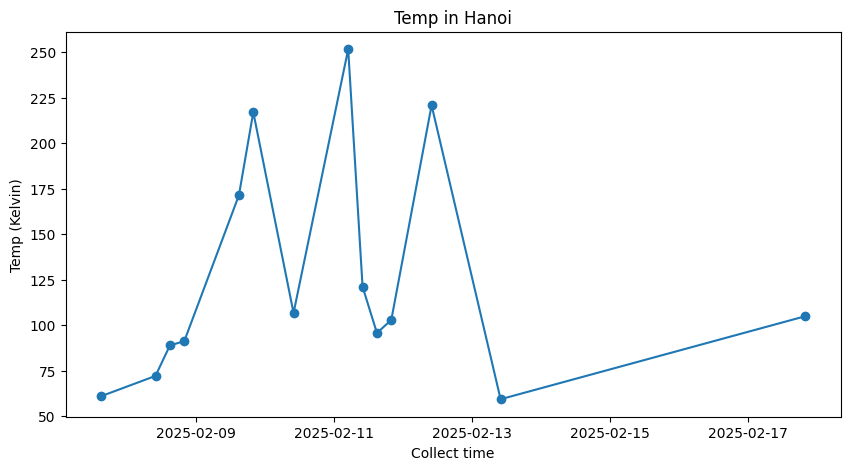

In [18]:
plt.figure(figsize=(10,5))
plt.plot(fix_df['collect_time_fix'], fix_df['pm2_5'], marker='o')
plt.title('Temp in Hanoi')
plt.xlabel('Collect time')
plt.ylabel('Temp (Kelvin)')

plt.show()